In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#df = pd.read_csv('../experiments/sw-data/amd.csv')
#df = pd.read_csv('../experiments/sw-data/sigmax.csv')
#df = pd.read_csv('../experiments/sw-data/gpu_sigmax.csv')
#df = pd.read_csv('../experiments/sw-data/debug.csv')
df = pd.read_csv('../experiments/sw-data/power_battery.csv')

df['time'] = df['time_alloc'] + df['time_parse'] + df['time_walk']
del df['bytes_out']
df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)

display(df)

,framework,api,allocated,num_jsons,bytes_in,time_alloc,time_parse,time_walk,max_values,time,throughput
3,RapidJSON,DOM,False,7271551,134217732,1.230000e-07,2.233620e+00,1.290000e-07,1,2.233620,6.008977e+07
4,RapidJSON,DOM (in situ),False,7271551,134217732,2.910000e-07,2.044200e+00,1.130000e-07,1,2.044200,6.565782e+07
5,RapidJSON,SAX,False,7271551,134217732,1.104000e-06,1.483090e+00,3.110000e-07,1,1.483091,9.049862e+07
0,simdjson,DOM,False,7271551,134217732,2.480000e-07,3.642000e-06,1.459970e+00,1,1.459974,9.193160e+07
1,simdjson,DOM,True,7271551,134217732,1.801610e-04,1.160000e-06,1.375610e+00,1,1.375791,9.755675e+07
6,RapidJSON,SAX,True,7271551,134217732,1.643820e-04,1.276730e+00,2.780000e-07,1,1.276895,1.051126e+08
2,simdjson,DOM (no keys),True,7271551,134217732,1.641870e-04,7.580000e-07,1.042830e+00,1,1.042995,1.286849e+08
8,Custom,whitespaces,False,7271551,134217732,1.731140e-04,6.366060e-01,1.190000e-07,1,0.636779,2.107759e+08
9,Boost Spirit.X3,minified,False,7271551,134217732,2.130000e-07,5.772020e-01,4.720000e-07,1,0.577203,2.325314e+08
10,Boost Spirit.X3,whitespace,False,7271551,134217732,1.318870e-04,5.060010e-01,3.050000e-07,1,0.506133,2.651826e+08


In [8]:
dg = df.groupby(['framework', 'max_values', 'bytes_in']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']

In [9]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in'])
dh = dh.droplevel(0, axis=1)
dh = dh.reindex(dh.mean().sort_values(ascending=False).index, axis=1)
display(dh)

,framework,Custom,Boost Spirit.X3,simdjson,RapidJSON
Max. values,Bytes in,,,,
1,134217732,0.398854,0.265183,0.128685,0.105113
2,134217737,0.367194,0.252049,0.124942,0.106033
4,134217740,0.343237,0.242618,0.120864,0.108384
8,134217764,0.328750,0.240433,0.123188,0.112912
16,134217768,0.327601,0.245756,0.125805,0.118623
32,134217827,0.326681,0.249570,0.129192,0.123623
64,134217903,0.327212,0.252708,0.127784,0.127134
128,134217816,0.326467,0.253919,0.129043,0.129308
256,134218013,0.326748,0.254425,0.132291,0.130581


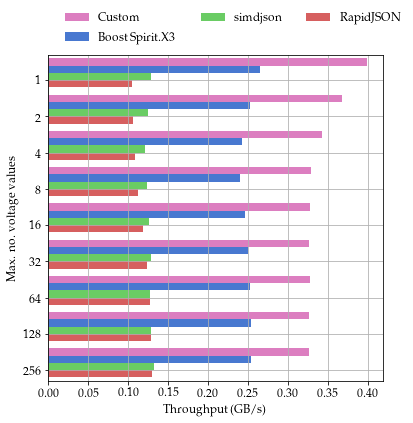

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))
    c = colors[i]
    if impl == "cuDF":
        c = '#AAAAAA'
        a = 0.4
        lw = 1.5
        ec = '#AAAAAA'
    else:
        a = 1
        lw = 0

    b = ax.barh(y=y+i*height, 
                width=x, 
                height=height, 
                color=c, 
                alpha=a, 
                linewidth=lw, 
                edgecolor=ec,
                ls='--')
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)
ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. no. voltage values")
ax.invert_yaxis()

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls, ncol=3, bbox_to_anchor=(0.018, 1.0), frameon=False)

fig.savefig('software.pdf')